# Lista 4

## Ćwiczenia

In [1]:
# wczytanie danych z naglowkami
serce = read.table("choroby_serca.txt", header = TRUE)
# wyswietlenie pierwszych wierszy naszych danych
head(serce)

,id,chd,age,tobacco,alcohol,adiposity,bmi,sbp,ldl,famhist,typea
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>
1,2,1,63,0.01,2.06,28.61,overwe,144,4.41,0,55
2,7,0,38,4.05,2.62,16.20,normal,142,3.38,0,59
3,11,1,60,6.00,56.06,32.27,overwe,206,2.95,0,72
4,13,0,17,0.00,0.00,10.05,normal,118,1.88,0,59
5,14,0,15,0.00,0.97,17.21,normal,132,1.87,0,49
6,17,0,49,7.50,34.49,22.00,overwe,120,15.33,0,60


#### i) Podział obserwacji na podzbiór uczący i testowy

In [2]:
# liczba pacjentow w zbiorze danych
pacjenci = nrow(serce)
pacjenci

[1] 462

In [3]:
# utworzenie podzbiorow uczacych i testowego bez dwoch pierwszych kolumn
podzbior_uczacy = serce[1:324, -1]
podzbior_testowy = serce[325:pacjenci, -1]

In [4]:
# wielkosc podzbiorow
pacjenci_podzbior_uczacy = dim(podzbior_uczacy)
pacjenci_podzbior_testowy = dim(podzbior_testowy)
pacjenci_podzbior_uczacy
pacjenci_podzbior_testowy

[1] 324  10

[1] 138  10

#### ii) Dopasowanie modelu regresji logistycznej

In [5]:
# wykonanie i podsumowanie modelu regresji logistycznej (dodajemy opcje: family = binomial()), w ktorym zmienna zalezna jest przejscie zawalu serca (chd)
model_log_1 = glm(chd ~ ., data = podzbior_uczacy, family = binomial())
summary(model_log_1)


Call:
glm(formula = chd ~ ., family = binomial(), data = podzbior_uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9585  -0.7536  -0.4738   0.7917   2.5219  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.248688   1.448680  -5.004 5.63e-07 ***
age          0.038197   0.014694   2.599  0.00934 ** 
tobacco      0.089316   0.031096   2.872  0.00408 ** 
alcohol     -0.003219   0.006669  -0.483  0.62936    
adiposity    0.025829   0.033944   0.761  0.44670    
bmiobese    -0.363034   0.581985  -0.624  0.53277    
bmioverwe   -0.466760   0.396408  -1.177  0.23901    
sbp          0.006309   0.007514   0.840  0.40116    
ldl          0.097374   0.069870   1.394  0.16343    
famhist      0.729383   0.353245   2.065  0.03894 *  
typea        0.044330   0.015533   2.854  0.00432 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382

In [6]:
# pod podsumowaniem residuow (Deviance Residuals) mamy podsumowanie estymatorow (Coefficients)
# statystycznie istotnymi zmiennymi sa: wyraz wolny, age, tobacco, famhist oraz typea

#### iii) Krokowa procedura wyboru modelu

In [7]:
# wybieramy zmienna najbardziej nieistotna - alcohol

In [8]:
# tworzymy model bez zmiennej alcohol
model_log_2 = glm(chd ~ . -alcohol, data = podzbior_uczacy, family = binomial())
summary(model_log_2)


Call:
glm(formula = chd ~ . - alcohol, family = binomial(), data = podzbior_uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9312  -0.7557  -0.4740   0.8174   2.5375  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.230944   1.448042  -4.994 5.93e-07 ***
age          0.038714   0.014682   2.637  0.00837 ** 
tobacco      0.086192   0.030319   2.843  0.00447 ** 
adiposity    0.025485   0.033935   0.751  0.45266    
bmiobese    -0.361860   0.580301  -0.624  0.53291    
bmioverwe   -0.482828   0.394684  -1.223  0.22121    
sbp          0.005622   0.007354   0.764  0.44461    
ldl          0.102225   0.069096   1.479  0.13902    
famhist      0.730807   0.353111   2.070  0.03849 *  
typea        0.044434   0.015536   2.860  0.00424 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 323  degrees of freedom
Residual dev

In [9]:
# wybieramy zmienna najbardziej nieistotna - bmi

In [10]:
# tworzymy model bez zmiennej bmi
model_log_3 = glm(chd ~ . -alcohol -bmi, data = podzbior_uczacy, family = binomial())
summary(model_log_3)


Call:
glm(formula = chd ~ . - alcohol - bmi, family = binomial(), data = podzbior_uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8964  -0.7575  -0.4904   0.8179   2.5513  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.977539   1.399580  -4.985 6.18e-07 ***
age          0.041996   0.014167   2.964  0.00303 ** 
tobacco      0.085490   0.030354   2.816  0.00486 ** 
adiposity    0.006115   0.024438   0.250  0.80243    
sbp          0.005381   0.007385   0.729  0.46622    
ldl          0.089691   0.067754   1.324  0.18558    
famhist      0.722047   0.350391   2.061  0.03933 *  
typea        0.043367   0.015303   2.834  0.00460 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 323  degrees of freedom
Residual deviance: 313.11  on 316  degrees of freedom
AIC: 329.11

Number of Fisher Scoring iterations: 5


In [11]:
# wybieramy zmienna najbardziej nieistotna - adiposity

In [12]:
# tworzymy model bez zmiennej adiposity
model_log_4 = glm(chd ~ . -alcohol -bmi -adiposity, data = podzbior_uczacy, family = binomial())
summary(model_log_4)


Call:
glm(formula = chd ~ . - alcohol - bmi - adiposity, family = binomial(), 
    data = podzbior_uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8777  -0.7521  -0.4916   0.8187   2.5406  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.944925   1.392708  -4.987 6.14e-07 ***
age          0.043331   0.013099   3.308 0.000939 ***
tobacco      0.085521   0.030432   2.810 0.004951 ** 
sbp          0.005752   0.007239   0.795 0.426835    
ldl          0.095189   0.064231   1.482 0.138344    
famhist      0.726470   0.350141   2.075 0.038006 *  
typea        0.043165   0.015275   2.826 0.004717 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 323  degrees of freedom
Residual deviance: 313.17  on 317  degrees of freedom
AIC: 327.17

Number of Fisher Scoring iterations: 5


In [13]:
# wybieramy zmienna najbardziej nieistotna - sbp

In [14]:
# tworzymy model bez zmiennej sbp
model_log_5 = glm(chd ~ . -alcohol -bmi -adiposity -sbp, data = podzbior_uczacy, family = binomial())
summary(model_log_5)


Call:
glm(formula = chd ~ . - alcohol - bmi - adiposity - sbp, family = binomial(), 
    data = podzbior_uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8511  -0.7578  -0.4810   0.8420   2.5290  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.26875    1.08876  -5.758 8.53e-09 ***
age          0.04681    0.01235   3.789 0.000151 ***
tobacco      0.08461    0.03034   2.789 0.005288 ** 
ldl          0.09697    0.06412   1.512 0.130425    
famhist      0.68455    0.34501   1.984 0.047238 *  
typea        0.04255    0.01523   2.794 0.005206 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 323  degrees of freedom
Residual deviance: 313.80  on 318  degrees of freedom
AIC: 325.8

Number of Fisher Scoring iterations: 5


In [15]:
# wybieramy zmienna najbardziej nieistotna - ldl

In [16]:
# tworzymy model bez zmiennej ldl
model_log_6 = glm(chd ~ . -alcohol -bmi -adiposity -sbp -ldl, data = podzbior_uczacy, family = binomial())
summary(model_log_6)


Call:
glm(formula = chd ~ . - alcohol - bmi - adiposity - sbp - ldl, 
    family = binomial(), data = podzbior_uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9514  -0.7556  -0.4883   0.8418   2.4787  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.97205    1.05678  -5.651 1.59e-08 ***
age          0.05028    0.01204   4.175 2.98e-05 ***
tobacco      0.08572    0.03048   2.812  0.00492 ** 
famhist      0.76238    0.33992   2.243  0.02491 *  
typea        0.04271    0.01516   2.817  0.00484 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 323  degrees of freedom
Residual deviance: 316.11  on 319  degrees of freedom
AIC: 326.11

Number of Fisher Scoring iterations: 5


In [17]:
# pozostal model z 4 zmiennymi, ktore sa istotne statystycznie

#### iv) Klasyfikator, rysunek klasyfikacji, błąd klasyfikacji

In [18]:
# wykonanie predykcji na podstawie wygenerowanego wczesniej modelu
# aby nie wychodzily nam niepoprawne wartosci, to model powinien zwracac prawdopodobienstwo: type = "response"
predykcja_log = predict(model_log_6, newdata = podzbior_testowy, type = "response")
predykcja_log

325        326        327        328        329        330        331 
0.41148863 0.28083731 0.50626287 0.26428327 0.16847055 0.28603313 0.41939911 
       332        333        334        335        336        337        338 
0.73115751 0.35177781 0.12083044 0.53370009 0.50428299 0.54264927 0.53044996 
       339        340        341        342        343        344        345 
0.26065256 0.38522146 0.57501952 0.31635236 0.41105805 0.34218332 0.67220264 
       346        347        348        349        350        351        352 
0.59861332 0.59601434 0.30514225 0.13615400 0.36078593 0.29707137 0.47565561 
       353        354        355        356        357        358        359 
0.17202369 0.61207681 0.68613079 0.45859238 0.30010480 0.45787352 0.43250739 
       360        361        362        363        364        365        366 
0.56762617 0.58332765 0.55331133 0.52857433 0.45092489 0.65375998 0.58193635 
       367        368        369        370        371        372        373 
0.48589102 0.72192356 0.47347665 0.58700995 0.65217927 0.44439330 0.45413714 
       374        375        376        377        378        379        380 
0.34924203 0.17557273 0.47774634 0.47072882 0.55426622 0.12321921 0.52815938 
       381        382        383        384        385        386        387 
0.38228030 0.18320504 0.58297609 0.57849429 0.77073709 0.70286537 0.30430147 
       388        389        390        391        392        393        394 
0.33543941 0.57911533 0.25341184 0.70049361 0.34648636 0.39991048 0.49448289 
       395        396        397        398        399        400        401 
0.23798760 0.75501168 0.53700944 0.28533943 0.72433209 0.37464924 0.42804650 
       402        403        404        405        406        407        408 
0.57314874 0.44224751 0.30673543 0.16364320 0.66279169 0.48990282 0.14089184 
       409        410        411        412        413        414        415 
0.41998952 0.28792052 0.61306024 0.31127896 0.40202830 0.62028411 0.45738118 
       416        417        418        419        420        421        422 
0.50108684 0.26410884 0.80158155 0.35436333 0.53043540 0.48178940 0.09264894 
       423        424        425        426        427        428        429 
0.44234067 0.66273678 0.54605478 0.70779870 0.31819870 0.44595397 0.42447055 
       430        431        432        433        434        435        436 
0.50131720 0.61550109 0.49436905 0.45367934 0.43641650 0.50741863 0.47923375 
       437        438        439        440        441        442        443 
0.42921953 0.57463998 0.58885408 0.46622561 0.91949014 0.85835701 0.53228453 
       444        445        446        447        448        449        450 
0.52149587 0.33681775 0.26398615 0.39628616 0.72298420 0.64390436 0.26834891 
       451        452        453        454        455        456        457 
0.37956115 0.14184737 0.13762342 0.08332926 0.24833239 0.10582355 0.09482556 
       458        459        460        461        462 
0.49521514 0.49529719 0.27469764 0.52049965 0.43806167

In [19]:
# podsumowanie predykcji
summary(predykcja_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.08333 0.31681 0.45763 0.44759 0.57177 0.91949 

In [20]:
# wartosci zawieraja sie w przedziale 0-1, wiec sa wlasciwe dla prawdopodobienstwa

In [21]:
# liczba obserwacji, dla ktorych dokonalismy predykcji
liczba_predykcji = length(predykcja_log)
liczba_predykcji

[1] 138

In [22]:
# przygotowanie pustego wektora dla predykcji przebycia zawalu serca
wektor_predykcji_log_1 = rep(0, liczba_predykcji)
# zmiana wartosci w wektorze predykcji, dla okreslonej wielkosci prawdopodobienstwa
wektor_predykcji_log_1[predykcja_log > 0.5] = 1
wektor_predykcji_log_1

[1] 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 [38] 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 [75] 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
[112] 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0

In [23]:
# tabela predykcji dla zawalu serca
tabela_predykcji_log_1 = table(True = podzbior_testowy$chd, Predicted = wektor_predykcji_log_1)
tabela_predykcji_log_1

    Predicted
True  0  1
   0 51 17
   1 33 37

In [24]:
# popelniamy dosyc duzy najgorszy blad z mozliwych - 33 pacjentow z zawalem serca zaklasyfikowalismy do grupy osob, ktore go nie mialy

In [25]:
# procent niepoprawnie dopasowanych obserwacji
blad_log_1 = (sum(tabela_predykcji_log_1) - sum(diag(tabela_predykcji_log_1))) / sum(tabela_predykcji_log_1) * 100
blad_log_1

[1] 36.23188

In [26]:
# jest to duzy blad
# wartosc graniczna wynoszaca 0.5 nie jest wyznaczona optymalnie - moze istnieje lepsza wartosc, ktora pozwolilaby zmniejszyc blad

In [27]:
# przygotowanie drugiego pustego wektora dla predykcji przebycia zawalu serca
wektor_predykcji_log_2 = rep(0, liczba_predykcji)
# zmiana wartosci w drugim wektorze predykcji, dla zmienionej wielkosci prawdopodobienstwa
wektor_predykcji_log_2[predykcja_log > 0.34] = 1
wektor_predykcji_log_2

[1] 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0
 [75] 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1

In [28]:
# tabela predykcji dla zawalu serca
tabela_predykcji_log_2 = table(True = podzbior_testowy$chd, Predicted = wektor_predykcji_log_2)
tabela_predykcji_log_2

    Predicted
True  0  1
   0 27 41
   1 11 59

In [29]:
# procent niepoprawnie dopasowanych obserwacji
blad_log_2 = (sum(tabela_predykcji_log_2) - sum(diag(tabela_predykcji_log_2))) / sum(tabela_predykcji_log_2) * 100
blad_log_2

[1] 37.68116

In [30]:
# pomimo niewielkiego zwiekszenia procentu blednych dopasowan, duzo lepiej przewidujemy osoby, ktore przeszly zawal (niz osoby zdrowe)

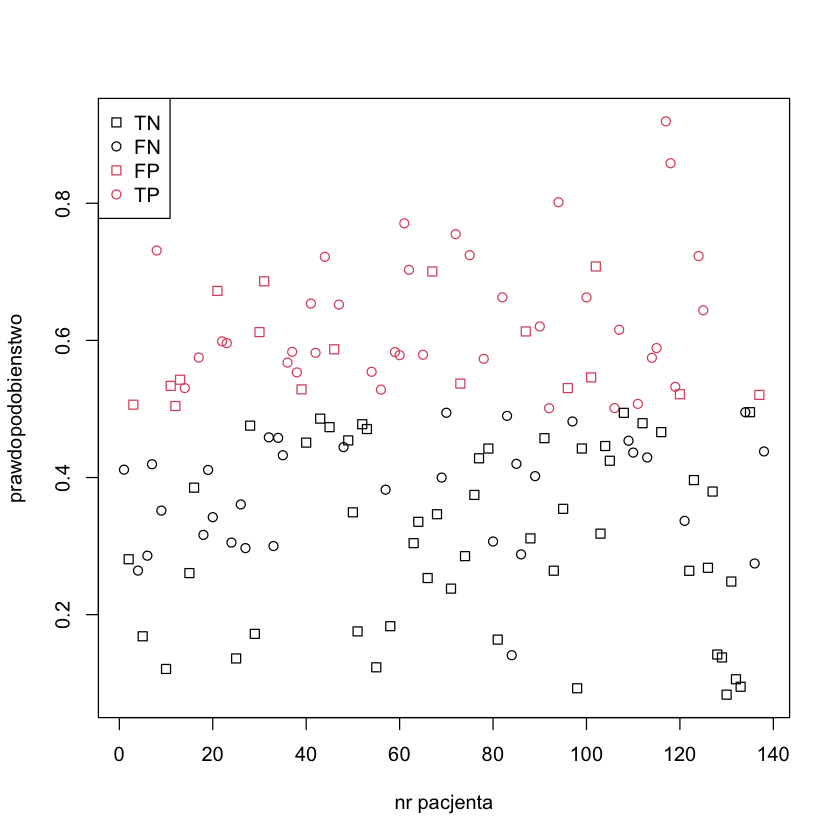

In [31]:
# wykres klasyfikacji
# na osi OX mamy okreslony numer obswerwacji (pacjenta), a na osi OY prawdopodobienstwo w zakresie 0-1
# roznymi kolorami zaznaczone sa osoby ktore nie mialy zawalu serca (na niebiesko) i mialy zawal serca (na czerwono)
plot(predykcja_log, pch = podzbior_testowy$chd, col = wektor_predykcji_log_1 + 1, xlab = "nr pacjenta", ylab = "prawdopodobienstwo")
# dodanie legendy
legend("topleft", c("TN", "FN", "FP", "TP"), pch = c(0, 1, 0, 1), col = c(1, 1, 2, 2))
# znaczenie legendy:
# TN - osoby bez zawalu zaklasyfikowane jako osoby bez zawalu
# FN - osoby z zawalem zaklasyfikowane jako osoby bez zawalu
# FP - osoby bez zawalu zaklasyfikowane jako osoby z zawalem
# TP - osoby z zawalem zaklasyfikowane jako osoby z zawalem

In [32]:
# kolka oznaczaja osoby, ktore przeszly zawal, a kwadraty osoby, ktore nie mialy zawalu
# czerwone kwadraty oznaczaja osoby, ktore nie mialy zawalu, ale przez nasz model zostaly zaklasyfikowane do grupy osob z zawalem
# czarne kolka oznaczaja osoby, ktore mialy zawal, ale przez nasz model zastaly zaklasyfikowane do grupy osob bez zawalu

#### v) Klasyfikator w oparciu o metodę LDA, porównanie z klasyfikatorem opartym na regresji logistycznej

In [33]:
# wczytanie paczki
library(MASS)

In [34]:
# wykonanie modelu regresji liniowej
model_lda_1 = lda(chd ~ . -alcohol -bmi -adiposity -sbp -ldl, data = podzbior_uczacy)
model_lda_1

Call:
lda(chd ~ . - alcohol - bmi - adiposity - sbp - ldl, data = podzbior_uczacy)

Prior probabilities of groups:
        0         1 
0.7222222 0.2777778 

Group means:
       age  tobacco   famhist    typea
0 37.83761 2.550214 0.1196581 52.27778
1 49.44444 5.991222 0.2888889 55.48889

Coefficients of linear discriminants:
               LD1
age     0.03991571
tobacco 0.10393202
famhist 0.86917957
typea   0.03595659

In [35]:
# prawdopodobienstwa a priori (Prior probabilities of groups) sa inne niz w modelu regresji logistycznej - tutaj maja scisle ustalone wartosci
# dla kazdej zmiennej mamy wyliczone zaleznosci przebycia zawalu (Group means)
# ponizej opisana jest funkcja dyskryminacyjna (Coefficients of linear discriminants) dzielaca nasz zbior na okreslone podzbiory

In [36]:
# wykonanie predykcji na podstawie modelu liniowego
# aby nie wychodzily nam niepoprawne wartosci, to model powinien zwracac prawdopodobienstwo: type = "response"
predykcja_lda_1 = predict(model_lda_1, newdata = podzbior_testowy, type = "response")
predykcja_lda_1

,0,1
325,0.5596868,0.4403132
326,0.6974441,0.3025559
327,0.5099298,0.4900702
328,0.6953026,0.3046974
329,0.8057523,0.1942477
330,0.6789951,0.3210049
331,0.5549420,0.4450580
332,0.2404328,0.7595672
333,0.6315977,0.3684023
334,0.8555137,0.1444863


In [37]:
# tabela predykcji dla zawalu serca
tabela_predykcji_lda_1 = table(True = podzbior_testowy$chd, Predicted = predykcja_lda_1$class)
tabela_predykcji_lda_1

    Predicted
True  0  1
   0 47 21
   1 31 39

In [38]:
# procent niepoprawnie dopasowanych obserwacji
blad_lda_1 = (sum(tabela_predykcji_lda_1) - sum(diag(tabela_predykcji_lda_1))) / sum(tabela_predykcji_lda_1) * 100
blad_lda_1

[1] 37.68116

In [39]:
# wartosc bledu w metodzie regresji liniowej wzrosla o ponad 1% wzgledem metody regresji logistycznej - metoda LDA jest gorsza

In [40]:
# wykonanie modelu regresji liniowej ze zmienionymi wartosciami prawdopodobienstwa a priori (takimi jak w modelu regresji logistycznej)
# aby nie wychodzily nam niepoprawne wartosci, to model powinien zwracac prawdopodobienstwo: type = "response"
model_lda_2 = lda(chd ~ . -alcohol -bmi -adiposity -sbp -ldl, data = podzbior_uczacy, prior = c(0.5, 0.5))
model_lda_2

Call:
lda(chd ~ . - alcohol - bmi - adiposity - sbp - ldl, data = podzbior_uczacy, 
    prior = c(0.5, 0.5))

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
       age  tobacco   famhist    typea
0 37.83761 2.550214 0.1196581 52.27778
1 49.44444 5.991222 0.2888889 55.48889

Coefficients of linear discriminants:
               LD1
age     0.03991571
tobacco 0.10393202
famhist 0.86917957
typea   0.03595659

In [41]:
# wykonanie predykcji na podstawie modelu liniowego  ze zmienionymi wartosciami prawdopodobienstwa a priori (takimi jak w modelu regresji logistycznej)
# aby nie wychodzily nam niepoprawne wartosci, to model powinien zwracac prawdopodobienstwo: type = "response"
predykcja_lda_2 = predict(model_lda_2, newdata = podzbior_testowy, type = "response")
predykcja_lda_2

,0,1
325,0.3283581,0.6716419
326,0.4699475,0.5300525
327,0.2858171,0.7141829
328,0.4674253,0.5325747
329,0.6147044,0.3852956
330,0.4485938,0.5514062
331,0.3241308,0.6758692
332,0.1085325,0.8914675
333,0.3973703,0.6026297
334,0.6948741,0.3051259


In [42]:
# tabela predykcji dla zawalu serca
tabela_predykcji_lda_2 = table(True = podzbior_testowy$chd, Predicted = predykcja_lda_2$class)
tabela_predykcji_lda_2

    Predicted
True  0  1
   0 17 51
   1  1 69

In [43]:
# procent niepoprawnie dopasowanych obserwacji
blad_lda_2 = (sum(tabela_predykcji_lda_2) - sum(diag(tabela_predykcji_lda_2))) / sum(tabela_predykcji_lda_2) * 100
blad_lda_2

[1] 37.68116

In [44]:
# wartosc bledu nie zmienila sie, jednak mamy zmienione klasyfikacje osob do okreslonych grup
# osoby z zawalem sa lepiej rozpoznawane niz w poprzednim modelu (jest tylko 1 osoba z zawalem rozpoznana jako osoba, ktora go nie miala)
# zwiekszyla sie zatem liczba osob ktore nei mialy zawalu, a zostaly rozpoznane jako osoby, ktore go przeszly (tylko 17 osob zostalo tutaj prawidlowo rozpoznanych)

In [45]:
# sami musimy podjac decyzje, ktore blad jest dla nas wazniejszy (ma wieksza wage) i moze wplywac na grosza jakosc predykcji